# Installing Modules

In [1]:
#!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="7uLbvv49VaQCbnnNV7AL")
#project = rf.workspace("university-f6psq").project("family-face-detection-2c9cd")
#dataset = project.version(1).download("yolov5")


In [2]:
pip install SciPy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing libraries and Modules

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import cv2
import os
import pathlib
from keras.models import load_model
from sklearn.metrics import classification_report

# Viewing training image

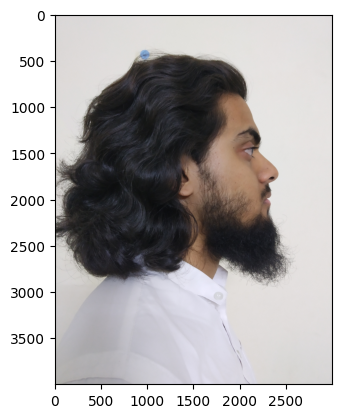

In [2]:
image = image.load_img('Data//Train//Arham//1.jpg')
plt.imshow(image) #💀

In [ ]:
Image = cv2.imread('Data\\Train\\Arham\\1.jpg')
cv2.imshow('graycsale image',Image)
cv2.waitKey()

In [ ]:
cv2.imread('/content/Family-Face-Detection-1/train/images/IMG_20230318_224805_jpg.rf.5b081b96854a0d114d9154217bb46c7e.jpg')

In [2]:
Image.shape

NameError: name 'Image' is not defined

# Configuring Training Dataset

In [2]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [3]:

train_dataset = train.flow_from_directory('DLprojectdataset//Train//',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'categorical')

validation_dataset = validation.flow_from_directory('DLprojectdataset//Validation//',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'categorical')

Found 105 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
train_dataset.class_indices

{'Eeshawar': 0, 'Jaiman': 1, 'Yash': 2}

In [5]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Creating our model

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    
                                   tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   
                                   tf.keras.layers.Dense(3, activation = 'softmax')])

# Training our model

In [19]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics= ['accuracy'])

In [20]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 50,
                     validation_data = validation_dataset)

Epoch 1/50
5/5 [==============================] - 3s 468ms/step - loss: 4.5441 - accuracy: 0.5333 - val_loss: 1.8839 - val_accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 2s 419ms/step - loss: 1.6255 - accuracy: 0.0667 - val_loss: 1.0974 - val_accuracy: 0.3333
Epoch 3/50
5/5 [==============================] - 2s 409ms/step - loss: 1.0985 - accuracy: 0.3333 - val_loss: 1.0892 - val_accuracy: 0.4667
Epoch 4/50
5/5 [==============================] - 2s 406ms/step - loss: 1.1160 - accuracy: 0.2667 - val_loss: 1.0892 - val_accuracy: 0.4667
Epoch 5/50
5/5 [==============================] - 2s 413ms/step - loss: 1.0882 - accuracy: 0.3333 - val_loss: 1.0952 - val_accuracy: 0.3333
Epoch 6/50
5/5 [==============================] - 2s 412ms/step - loss: 1.1136 - accuracy: 0.5333 - val_loss: 1.0796 - val_accuracy: 0.4667
Epoch 7/50
5/5 [==============================] - 2s 406ms/step - loss: 1.1005 - accuracy: 0.4667 - val_loss: 1.0572 - val_accuracy: 0.4667
Epoch 8/50
5/5 [====

# Testing our model

In [21]:
validation_dataset.class_indices

{'Eeshawar': 0, 'Jaiman': 1, 'Yash': 2}

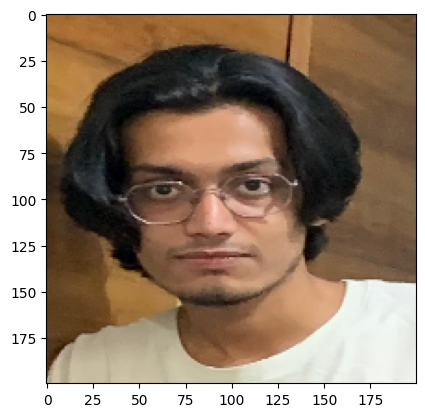

1/1 [==============================] - 0s 37ms/step
[[0.0000000e+00 1.0000000e+00 1.0304305e-21]]
0
Jaiman


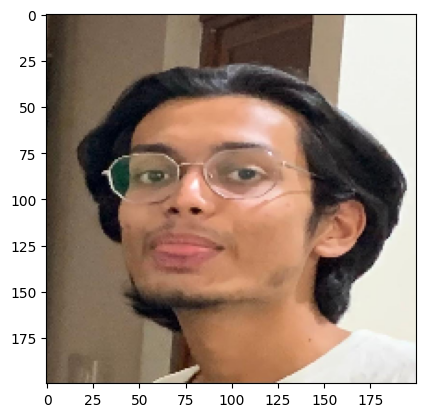

1/1 [==============================] - 0s 34ms/step
[[0. 0. 1.]]
1
Yash


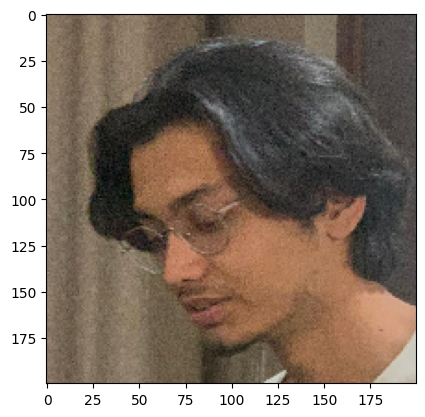

1/1 [==============================] - 0s 40ms/step
[[0. 0. 1.]]
2
Yash


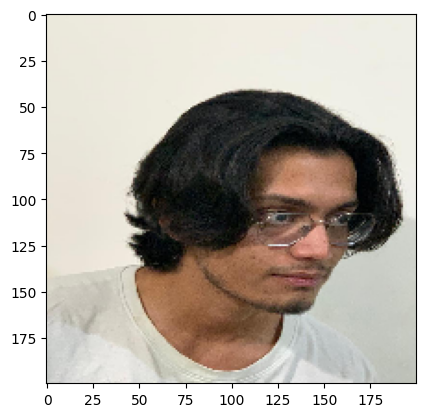

1/1 [==============================] - 0s 40ms/step
[[0. 1. 0.]]
3
Jaiman


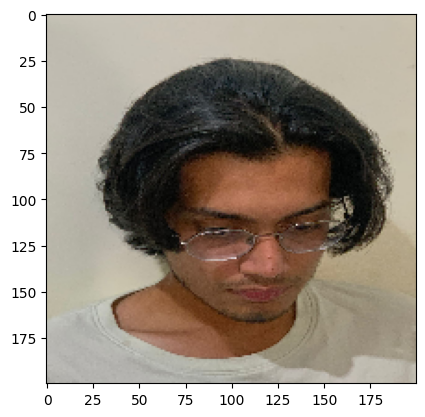

1/1 [==============================] - 0s 32ms/step
[[0. 1. 0.]]
4
Jaiman


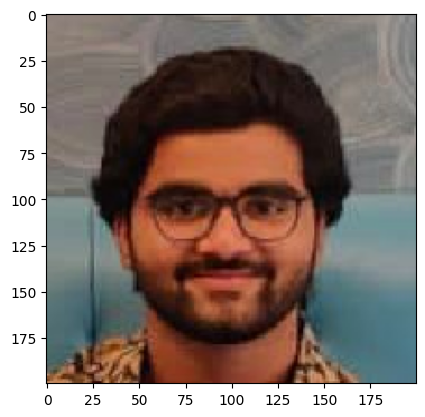

1/1 [==============================] - 0s 33ms/step
[[1. 0. 0.]]
5
Eeshawar


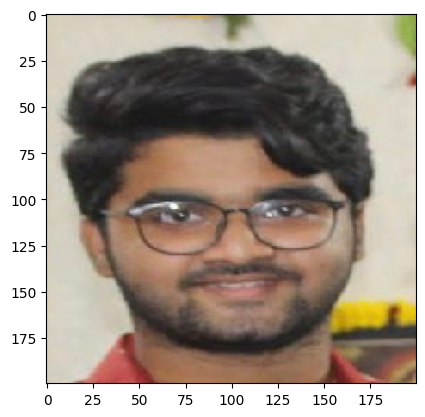

1/1 [==============================] - 0s 37ms/step
[[1. 0. 0.]]
6
Eeshawar


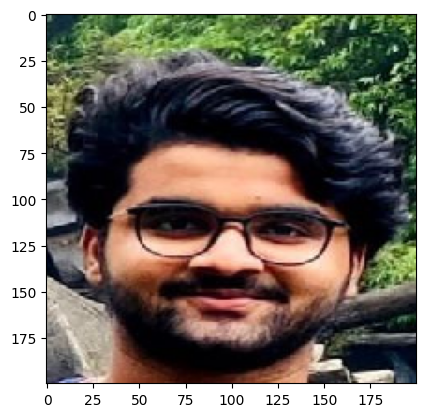

1/1 [==============================] - 0s 36ms/step
[[1. 0. 0.]]
7
Eeshawar


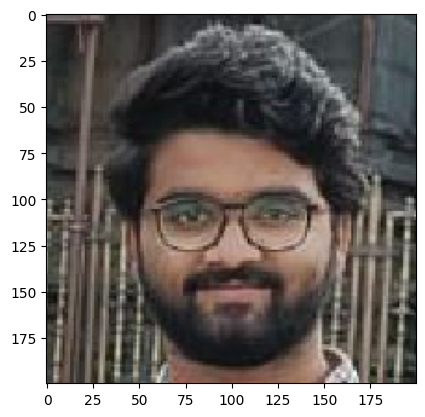

1/1 [==============================] - 0s 35ms/step
[[1. 0. 0.]]
8
Eeshawar


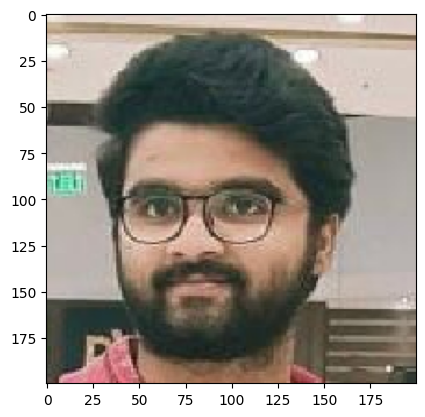

1/1 [==============================] - 0s 35ms/step
[[1. 0. 0.]]
9
Eeshawar


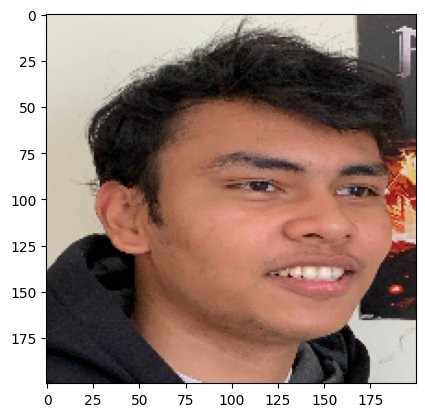

1/1 [==============================] - 0s 34ms/step
[[0. 1. 0.]]
10
Jaiman


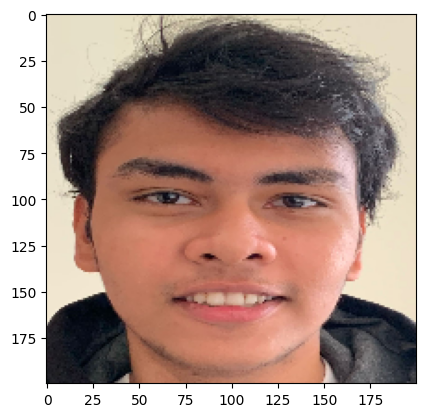

1/1 [==============================] - 0s 33ms/step
[[0. 1. 0.]]
11
Jaiman


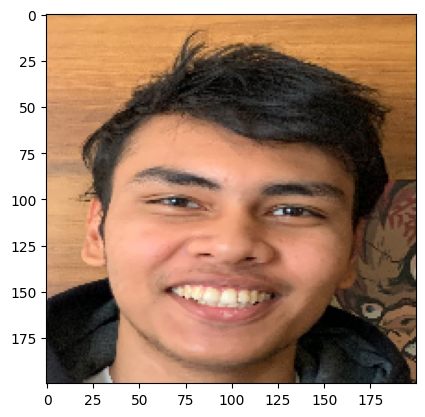

1/1 [==============================] - 0s 34ms/step
[[0. 1. 0.]]
12
Jaiman


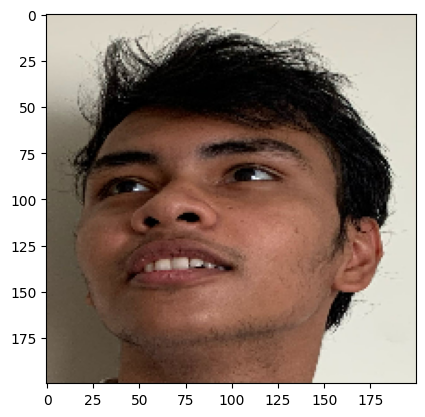

1/1 [==============================] - 0s 33ms/step
[[0. 1. 0.]]
13
Jaiman


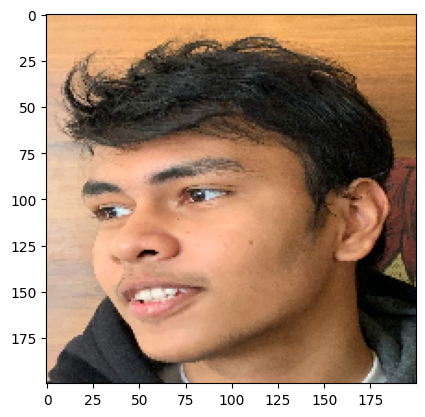

1/1 [==============================] - 0s 39ms/step
[[0. 1. 0.]]
14
Jaiman


In [25]:
dir_path = 'DLprojectdataset//Test//'
y_pred = []
count = 0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    
    val = model.predict(images)
    print(val)
    print(count)
    count += 1
    val = val.squeeze()
    if val[0] == 1:
        y_pred.append("Eeshawar")
        print("Eeshawar")
    elif val[1] == 1:
        y_pred.append("Jaiman")
        print("Jaiman")
    elif val[2] == 1:
        y_pred.append("Yash")
        print("Yash")

In [31]:
y_true = ["Yash", "Yash", "Yash", "Yash", "Yash", "Eeshawar", "Eeshawar", "Eeshawar", "Eeshawar", "Eeshawar", "Jaiman", "Jaiman", "Jaiman", "Jaiman", "Jaiman" ]
#y_pred = ["Arham", "Arham", "Asif", "Arham", "Arham", "Arham", "Asif", "Asif", "Asif", "Asif", "Asif", "Asif", "Fateen", "Arham", "Fateen", "Fateen", "Arham", "Fateen", ]
conf = confusion_matrix(y_true, y_pred)
print(len(y_true), len(y_pred))
score = 0
for i in range(len(y_true)):
    if y_pred[i] == y_pred[i]:
        score += 1
print(f"Accuracy: {(score/len(y_true))*100}%")

15 15
Accuracy: 100.0%


In [38]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

    Eeshawar       1.00      1.00      1.00         5
      Jaiman       0.62      1.00      0.77         5
        Yash       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15



# Additional Inputs

In [23]:
if val[0][0] == 1:
    print("Arham")
elif val[0][1] == 1:
    print('Asif')
elif val[0][2] == 1:
    print("Fateen")

Fateen


In [106]:
cascade_path = pathlib.Path(cv2.__file__).parent.absolute() / "data/haarcascade_frontalface_default.xml"
print(cascade_path)

C:\Users\Event2\AppData\Local\Programs\Python\Python310\lib\site-packages\cv2\data\haarcascade_frontalface_default.xml


In [107]:
classifier = cv2.CascadeClassifier(str(cascade_path))

In [25]:
classifier =load_model(r'C:\Users\Event2\Desktop\Jupyter\checkpoint')

OSError: Unable to open file (file signature not found)

In [1]:
camera = cv2.VideoCapture(1)

NameError: name 'cv2' is not defined

In [117]:
while True:
    _, frame = camera.read()
    labels=[]
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(
    gray_image,
    scaleFactor = 1.1,
    minNeighbors = 5,
    minSize = (30,30),
    flags = cv2.CASCADE_SCALE_IMAGE
    )
    
    for(x, y, width, height) in faces:
        cv2.rectangle(frame, (x,y), (x+width, y+height), (255, 255, 0), 2)
        #cv2.putText(frame, 'Arham', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        roi_gray = gray_image[y:y+height, x:x+width]
        #roi_gray = cv2.resize(roi_gray,(200,200), interpolation = cv2.INTER_AREA)
        
        if np.sum([roi_gray]) != 0.0:
            roi = roi_gray.astype("float") / 255.0
            roi = image.img_to_array(roi)
            roi = np.expand_dims(roi, axis=-1)
            
            prediction = model.predict(roi)
            label = faces_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    cv2.imshow("Faces", frame)
    if cv2.waitKey(1) == ord("q"):
        break
        
camera.release()
cv2.destroyAllWindows()

ValueError: in user code:

    File "C:\Users\Event2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Event2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Event2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Event2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\Event2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Event2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 200, 200, 3), found shape=(None, 200, 1, 1)


In [80]:
labels = train_dataset.class_indices

In [81]:
    val = train_dataset.class_indices[model.predict(images)]

1/1 [==============================] - 0s 196ms/step


TypeError: unhashable type: 'numpy.ndarray'

In [97]:
 if np.sum([faces]) != 0.0:
        roi = faces.astype("float") / 255.0
        roi = image.img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)